# Analemma Plots

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/russellgoyder/sundial/HEAD?labpath=docs%2Fnb%2Fsundial_plots.ipynb)

This notebook uses [analemma.plot][] to visualize various properties of sundials, in particular analemmas.

In [1]:
from analemma import geometry as geom, orbit, plot as aplot
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi
earth = orbit.PlanetParameters.earth()
camdial = geom.DialParameters(theta=37.5/180*pi, iota=37.5/180*pi, i=0, d=0) # Analemmatic dial in Cambridge, UK

## The Analemma

The analemma is the path traced by the sun in the sky, or the shadow on a sundial, throughout one year when viewed at the same time each day, and typically has a figure-of-eight shape, because of the [equation of time](equation_of_time.md).

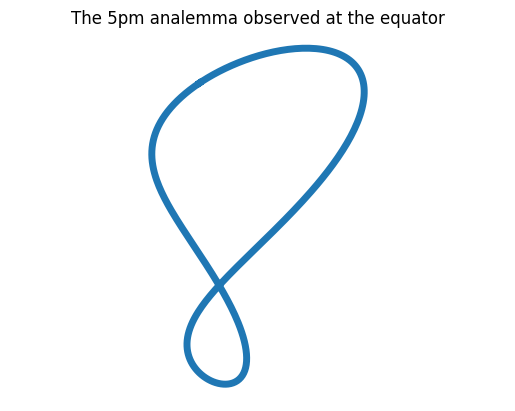

In [2]:
fig, ax = plt.subplots()
ax.axis("equal")

latitude_degrees = 0.1
thedial = geom.DialParameters(theta=(90-latitude_degrees)/180*pi, iota=0, i=0, d=0)

aplot.plot_analemma(ax, hour_offset=5, planet=earth, dial=thedial, format_string="-", linewidth=5)

_ = ax.set_title("The 5pm analemma observed at the equator")
_ = plt.axis("off")

## Hourly Analemmas in Cambridge, UK

In the plots below we show several analemmas, one per hour of daytime. The line style shows the season. One line showing the path of the shadow tip during the day for each solstice is also shown (with line style appropriate to the season) and forms an envelope marking the longest shadows in Winter and the shortest shadows in Summer. Similarly, the path of the shadow tip on each equinox is shown and appears as a straight line. Moreover, the two straight lines fall on top of each other.

A black circle marks the base of the gnomon, which has unit length.

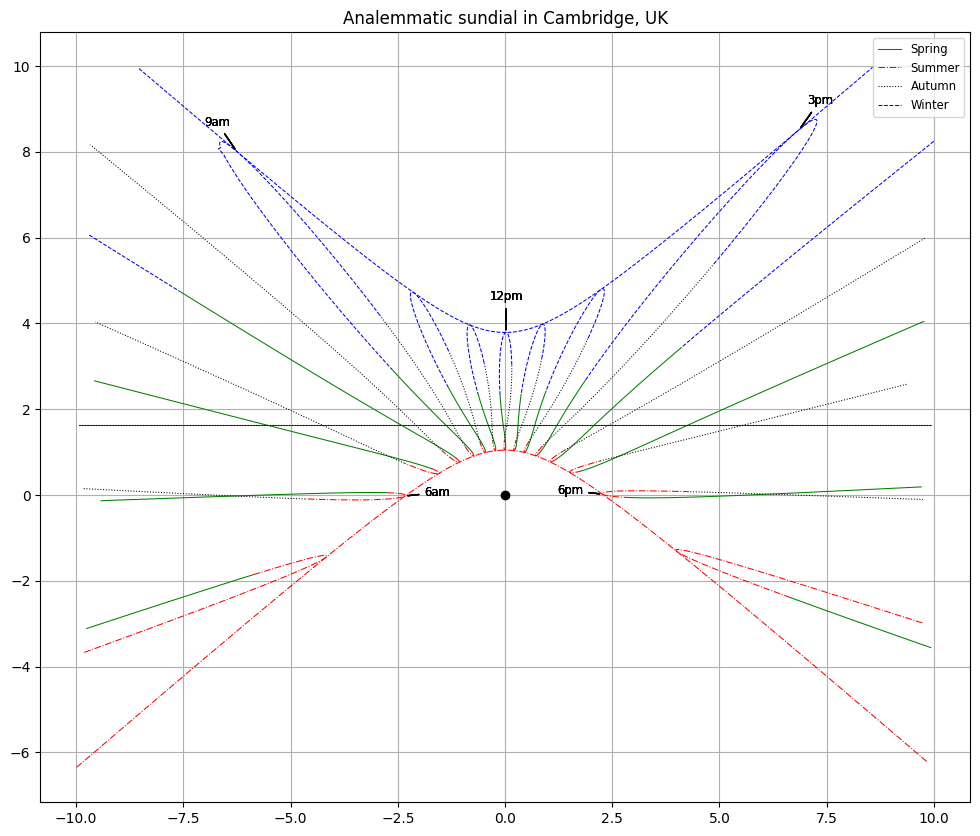

In [3]:

fig, ax = plt.subplots(figsize=(12, 10))
ax.grid()
ax.axis("equal")

aplot.plot_hourly_analemmas(ax, earth, camdial, year=2024, title="Analemmatic sundial in Cambridge, UK")

## Tropical Analemmas

At $10^\circ$ South, for the dial below with non-zero inclination and declination, and with an inclining gnomon, we observe a rotated and compressed set of analemmas.

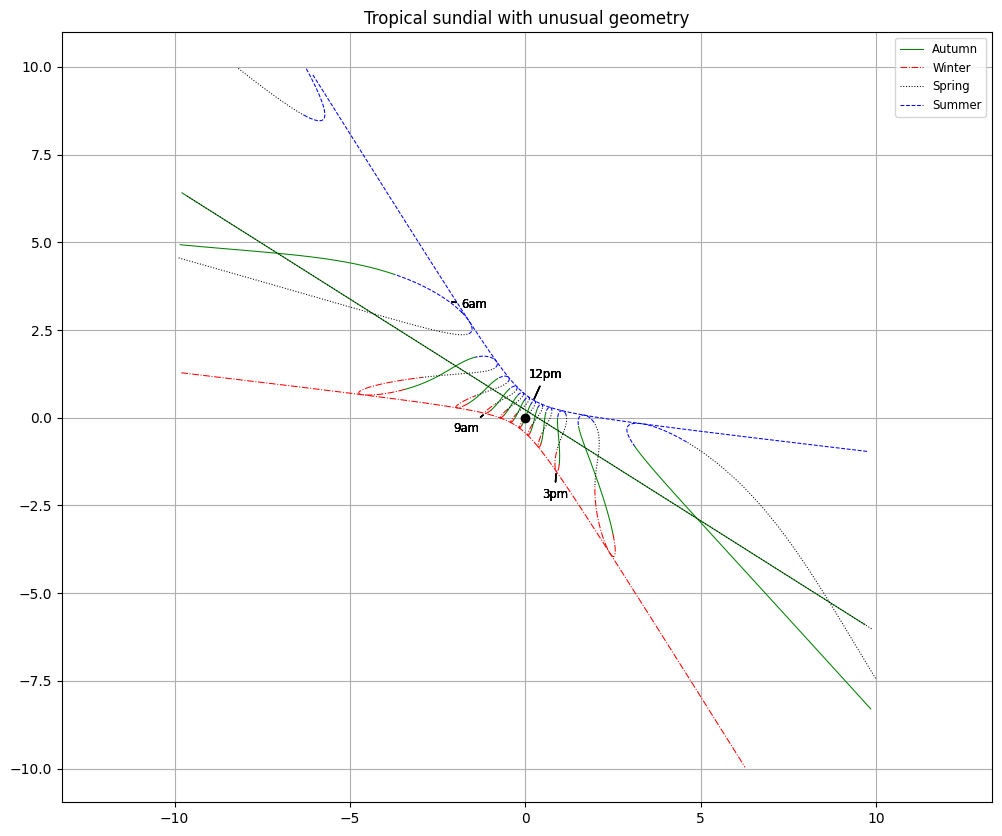

In [4]:
tropicaldial = geom.DialParameters(theta=100/180*pi, iota=20/180*pi, i=-15/180*pi, d=30/180*pi)

fig, ax = plt.subplots(figsize=(12, 10))
ax.grid()
ax.axis("equal")

aplot.plot_hourly_analemmas(ax, earth, tropicaldial, year=2024, title="Tropical sundial with unusual geometry")

## Arctic Analemmas

At $80^\circ$ North, there is no contribution during Winter as the sundial experiences 24-hour darkness. During summer, there are 24 hours of daylight every day and so the path taken by the tip of the shadow during the June solstace forms a closed loop, while the corresponding paths on the March and September equinoxes are straight lines as before.

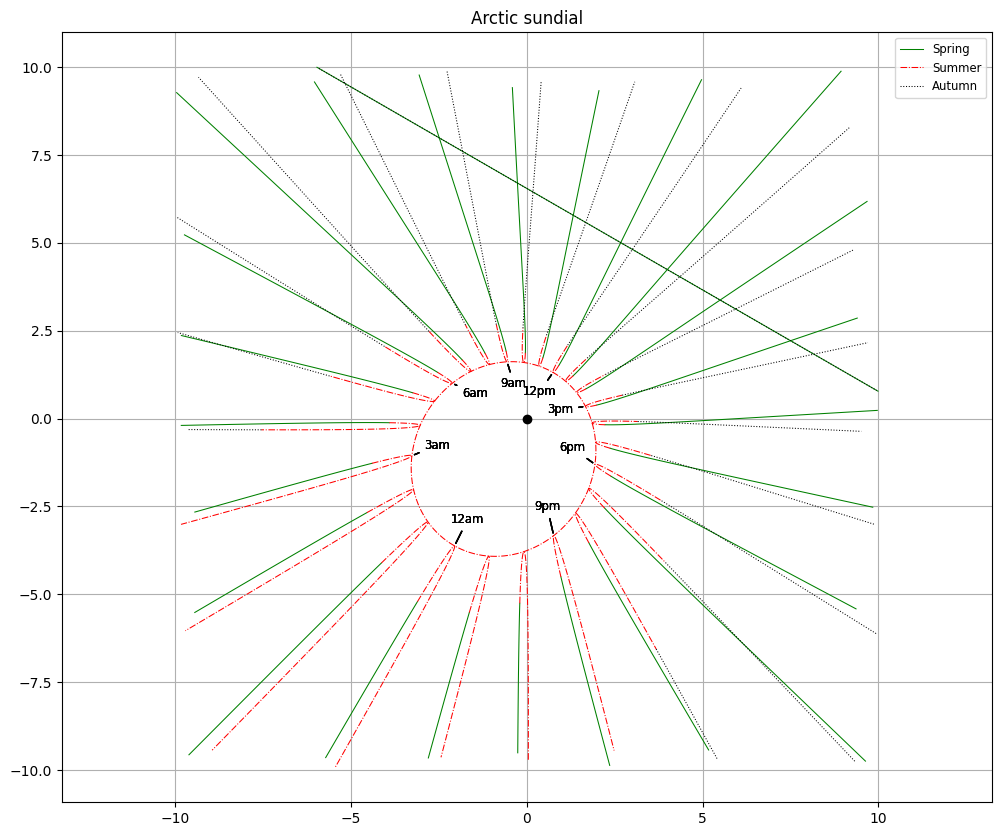

In [5]:
arcticdial = geom.DialParameters(theta=10/180*pi, iota=0, i=0, d=30/180*pi)

fig, ax = plt.subplots(figsize=(12, 10))
ax.grid()
ax.axis("equal")

aplot.plot_hourly_analemmas(ax, earth, arcticdial, year=2024, title="Arctic sundial")

## Common Dial Types

Sundials are much easier to construct in certain special cases where the gnomon is a parallel to Earth's axis of rotation (known as a style) and the dial face has a special alignment.

The simplest is an equatorial dial, where the dial face is parallel to the equator, and the analemmas are evenly placed around the circle. On the equinoxes, sunrays are parallel to the dial face and so cannot be shown.

A horizontal dial's face is parallel to the ground, while a vertical dial's face is perpendicular. In the northern hemisphere, vertical dial faces south and in the southern hemisphere it faces north.

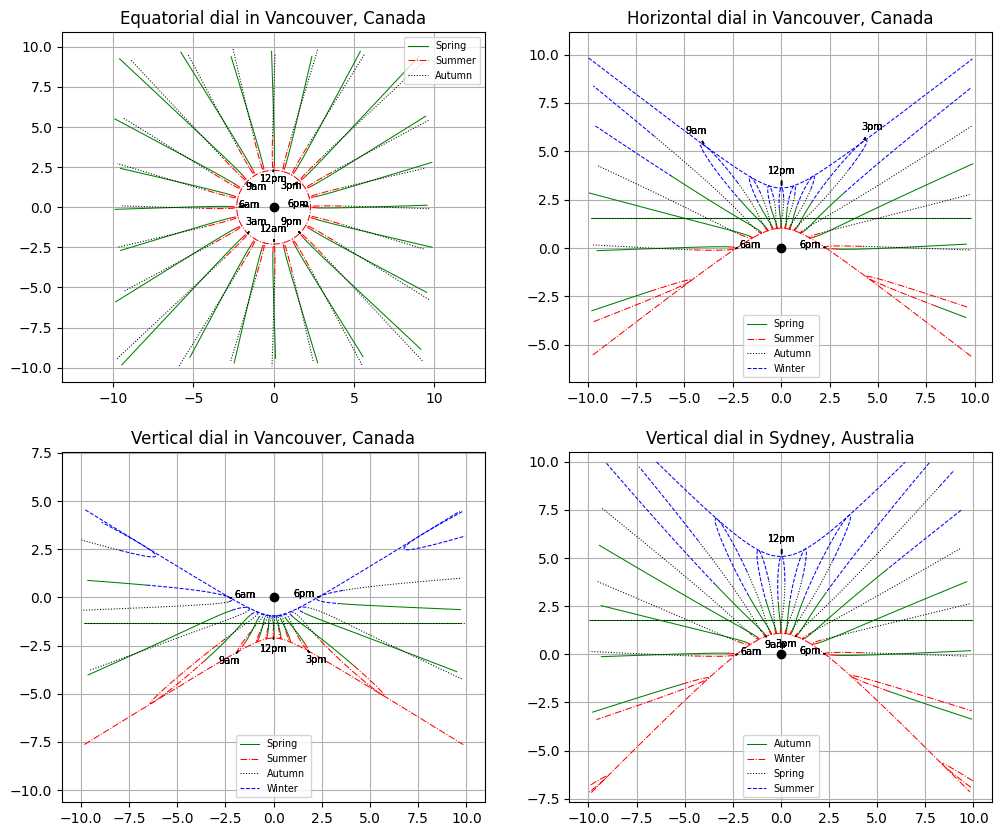

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax in axs.flat:
    ax.grid(True)
    ax.axis("equal")

def _analemma_plot(ax, dial, title):
    aplot.plot_hourly_analemmas(ax, earth, dial, year=2024, title=title)

vancouver = 49.3
_analemma_plot(axs[0,0], geom.DialParameters.equatorial(latitude=vancouver), "Equatorial dial in Vancouver, Canada")
_analemma_plot(axs[0,1], geom.DialParameters.horizontal(latitude=vancouver), "Horizontal dial in Vancouver, Canada")
_analemma_plot(axs[1,0], geom.DialParameters.vertical(latitude=vancouver), "Vertical dial in Vancouver, Canada")

_analemma_plot(axs[1,1], geom.DialParameters.vertical(latitude=-33.9), "Vertical dial in Sydney, Australia")


For the connection between the angle of the sun, the date, and the time, see [The Equation of
Time](equation_of_time.md), [Sunrise and Sunset](sunrise_and_sunset.md), and [Orbit Analysis](orbit_analysis.md).

For the mathematics of the analemma, see the notebooks starting with [Setup and Definitions](sundial_setup.md) and culminating in [The Analemma](analemma.md).